# Linear Regression

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("C:/Users/sevva/Downloads/linear_regression_dataset.csv")

In [6]:
df

,deneyim;maas
0,0.5;2500
1,0;2250
2,1;2750
3,5;8000
4,8;9000
5,4;6900
6,15;20000
7,7;8500
8,3;6000
9,2;3500


In [8]:
df = pd.read_csv("C:/Users/sevva/Downloads/linear_regression_dataset.csv", sep =";")

In [9]:
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


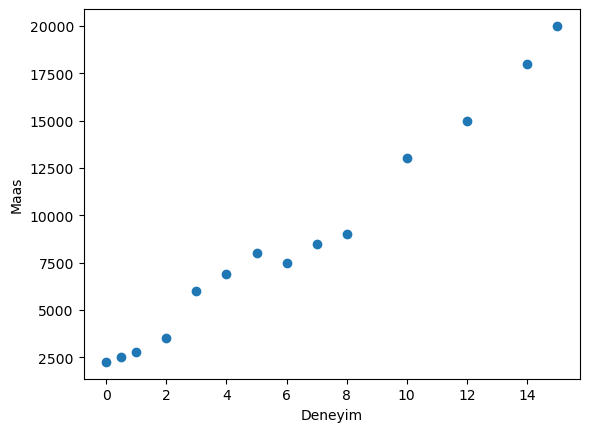

In [11]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim")
plt.ylabel("Maas")
plt.show()

In [12]:
x = df.deneyim.values

In [13]:
x.shape

(14,)

In [14]:
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [15]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x,y)

LinearRegression()

In [16]:
import numpy as np
b0 = linear_reg.predict([[0]])
print("b0: ",b0)

b0:  [[1663.89519747]]


In [17]:
b1 = linear_reg.coef_
print("b1: ",b1)

b1:  [[1138.34819698]]


In [18]:
new_salary = 1663 + 1138*11
print(new_salary)

14181


In [23]:
b11 = linear_reg.predict([[11]])
print("b11: ",b11)

b11:  [[14185.72536421]]


In [24]:
y_head = linear_reg.predict(x)

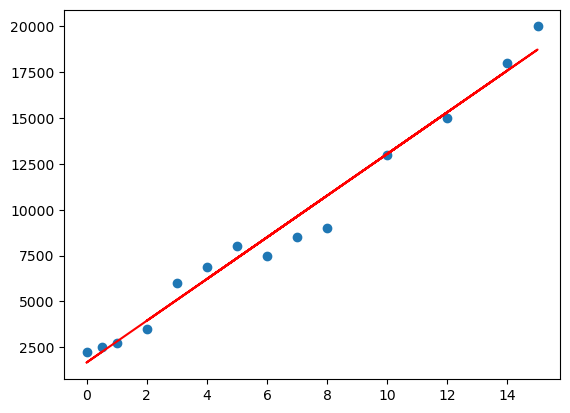

In [25]:
plt.plot(x,y_head, color="red")
plt.scatter(x,y)
plt.show()

In [26]:
from sklearn.metrics import r2_score
print("R Square Score: ",r2_score(y,y_head))

R Square Score:  0.9775283164949902


In [27]:
from sklearn.metrics import mean_squared_error
print("Mean Square Error: ",mean_squared_error(y,y_head))

Mean Square Error:  685945.8459614947


In [28]:
MSE = np.square(np.subtract(y,y_head)).mean()
print("Mean Squared Error: ",MSE)

Mean Squared Error:  685945.8459614947


# MLR

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("C:/Users/sevva/Downloads/advertising.csv")

In [32]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = df[['TV','Radio','Newspaper']]
y = df["Sales"]

In [36]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 100)

In [37]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [38]:
print("Intercept: ",mlr.intercept_)

Intercept:  4.334595861728431


In [39]:
print("Coefficents: ",list(zip(x,mlr.coef_)))

Coefficents:  [('TV', 0.053829108667250075), ('Radio', 0.1100122438855806), ('Newspaper', 0.0062899501461303525)]


In [40]:
y_pred = mlr.predict(x_test)
print("prediction for test set: {}".format(y_pred))

prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [45]:
mlr_dff = pd.DataFrame({"Actual values": y_test, "Prediciton values": y_pred})
mlr_dff.head()

,Actual values,Prediciton values
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484


In [49]:
from sklearn import metrics
meansqerr = metrics.mean_squared_error(y_test,y_pred)
print("R squared: {:.2f}".format(mlr.score(x,y)*100))
print("Mean Squared error: ",meansqerr)

R squared: 90.11
Mean Squared error:  2.6360765623280646
